In [1]:
import torch
import numpy as np
import torch.nn as nn

from topological_layers import CubicalLayer

In [2]:
import pandas as pd

In [3]:
I = np.array(pd.read_csv('mnist_test.csv', header=None, sep=','), dtype=np.float32)
idx = np.argwhere(I[:,0] == 8)
image = np.reshape(-I[idx[8],1:], [28,28])
image = (image-image.min())/(image.max()-image.min())
image_clean = np.array(image)
image[2:5,2:5]        -= 0.6
image[25:27,25:27]    -= 0.6
image[25:27,2:5]      -= 0.6
image[1:4,24:26]      -= 0.6

In [4]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Image at epoch 0')

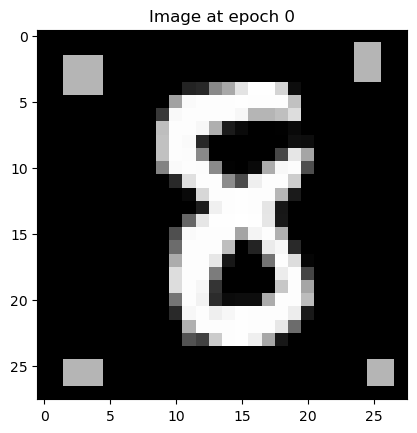

In [5]:
plt.figure()
plt.imshow(image, cmap='Greys')
plt.title('Image at epoch 0')

In [6]:
from tqdm.auto import trange
from torch.optim import SGD

In [7]:
cubical = CubicalLayer(dim=0, card=100)

if isinstance(image, np.ndarray):
    image = torch.from_numpy(image).unsqueeze(0)
    image.requires_grad = True

optimizer = SGD([image], lr=0.001, weight_decay=0.0)

epochs = 3001
pbar = trange(epochs)

for epoch in pbar:
    optimizer.zero_grad()
    
    dgm = cubical(image)[0]
    loss = 10. * torch.abs(dgm[:, 1] - dgm[:, 0]).sum()
    loss = loss + torch.min(image[0].abs(), (1 - image[0]).abs()).sum()
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        pbar.set_postfix_str(f"Loss: {loss.detach().item():.4f}")

  0%|          | 0/3001 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Image at epoch 3000')

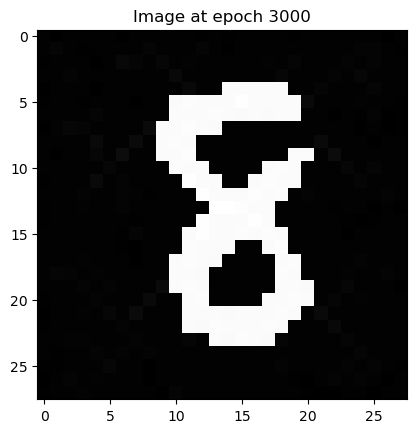

In [8]:
plt.figure()
plt.imshow(image.detach().cpu().squeeze(0).numpy(), cmap='Greys')
plt.title('Image at epoch ' + str(epoch))